<a href="https://colab.research.google.com/github/GadirajuSanjayvarma/ImageCaptioning/blob/main/imageCaptioningLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from zipfile import ZipFile 
  


In [ ]:
def CNN_ENCODER(url,data_transforms,model):
  model.eval()
  urllib.request.urlretrieve(url, "00000001.jpg")
  
  img=Image.open("/content/00000001.jpg")
  transformed_image=data_transforms['val'](img).unsqueeze(0)
  results=model_ft(transformed_image)
  return results


In [ ]:
data_transforms = {
    
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
   }
model_ft = models.resnet18(pretrained=True)


results=CNN_ENCODER("https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/%E3%83%AF%E3%82%AD%E3%83%B320120701.JPG/375px-%E3%83%AF%E3%82%AD%E3%83%B320150702.JPG",data_transforms,model_ft)   

In [ ]:
print(model_ft)

In [ ]:
print(torch.argmax(results))

tensor(1)


In [ ]:
def downloadDataset():

  urllib.request.urlretrieve("https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_text.zip", "Flickr8k_text.zip")
    
  # specifying the zip file name 
  file_name = "/content/Flickr8k_text.zip"
    
  # opening the zip file in READ mode 
  with ZipFile(file_name, 'r') as zip: 
      # printing all the contents of the zip file 
      zip.printdir() 
    
      # extracting all the files 
      print('Extracting all the files now...') 
      zip.extractall() 
      print('Done!') 
  
  #downloading image files    
  urllib.request.urlretrieve("https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip", "Flickr8k_image.zip")
    
  # specifying the zip file name 
  file_name = "/content/Flickr8k_image.zip"
    
  # opening the zip file in READ mode 
  with ZipFile(file_name, 'r') as zip: 
      # printing all the contents of the zip file 
      zip.printdir() 
    
      # extracting all the files 
      print('Extracting all the files now...') 
      zip.extractall() 
      print('Done!')    


In [ ]:
downloadDataset()

In [ ]:
def getVocabulary(filepath):
  vocabulary=set()

  f = open(filepath, "r")
  i=0
  for index,x in enumerate(f):
    
    #print(x.split('\t'))
    x=x.split('\t')
    #a=x[0][:-2]
    b=x[1][:-2]
    for x in b.split(' ')[:-1]:
      vocabulary.add(x.lower())
      
    #vocabulary.add(x.lower() for x in b.split(' ')[:-1])
  return list(vocabulary)

In [ ]:
dataset_vocabulary=getVocabulary("/content/Flickr8k.lemma.token.txt")

In [ ]:
dataset_vocabulary.append("<EOS>")

In [ ]:
print(len(dataset_vocabulary))

6708


In [ ]:
int2word={dataset_vocabulary.index(x):x for x in dataset_vocabulary}
word2int={x:dataset_vocabulary.index(x) for x in dataset_vocabulary}

In [ ]:
print(word2int["<EOS>"])

6707


In [ ]:
print(int2word)
print(word2int)

{0: 'hoop', 1: 'everyday', 2: 'india', 3: 'pinwheel', 4: 'stretch', 5: 'cheeked', 6: 'interact', 7: 'pitch', 8: 'costumed', 9: 'oppsite', 10: 'bullet', 11: 'videotape', 12: 'vw', 13: 'eyed', 14: 'worn', 15: 'reddish', 16: 'blanket', 17: 'seed', 18: 'assistance', 19: 'marx', 20: 'stall', 21: 'atomic', 22: 'yougn', 23: 'snowpants', 24: 'residential', 25: 'retrives', 26: 'dip', 27: 'muxzzled', 28: 'burn', 29: 'caramel', 30: 'cut', 31: 'bullhorn', 32: 'siren', 33: 'balck', 34: 'weiner', 35: 'flower-bed', 36: 'rockstar', 37: 'before', 38: 'floaties', 39: 'lolly', 40: 'hand', 41: 'hortons', 42: 'bulldozer', 43: 'simultaneously', 44: 'shadow', 45: 'stumble', 46: 'chips', 47: 'bro!', 48: 'lucky', 49: 'hoof', 50: 'supervise', 51: 'camcorder', 52: 'adult', 53: 'kilt', 54: 'minivan', 55: 'hallway', 56: 'groom', 57: 'corridor', 58: 'hood', 59: 'thriller', 60: 'motorist', 61: 'coloring', 62: 'heavily', 63: 'recieving', 64: 'jersay', 65: 'piglet', 66: 'blitz', 67: 'presidential', 68: 'parkinglot', 6

In [ ]:
dataset=[]

f = open("/content/Flickr8k.lemma.token.txt", "r")
i=0
for index,x in enumerate(f):

  x=x.split('\t')
  a=x[0][:-2]
  b=x[1][:-2]
  b1=[]
  for word in b.split(' ')[:-1]:
    #print(word)
    b1.append(dataset_vocabulary.index(word.lower()))
  dataset.append([a,b1])
  

In [ ]:
dataset=dataset
print(dataset[:3])

[['1305564994_00513f9a5b.jpg', [2850, 1970, 6669, 2440, 736, 5508, 2444, 2249, 2794, 474, 5955, 4895, 736, 289, 6010]], ['1305564994_00513f9a5b.jpg', [3612, 736, 881, 2850, 4267, 6441, 2259, 2850, 524]], ['1305564994_00513f9a5b.jpg', [3612, 6119, 2444, 5077, 1021, 2325, 6126, 1534, 6, 2444, 6036, 2231, 4643, 3263]]]


In [ ]:
import random
random.shuffle(dataset)

In [ ]:
train_dataset=[dataset[i] for i in range(0,(int)(0.98*len(dataset)))]
test_dataset=[dataset[i] for i in range((int)(0.98*len(dataset)),len(dataset))]

In [ ]:
from torch.utils.data import Dataset
class get_dataset(Dataset):
  def __init__(self,dataset,max_len,data_transforms):
    self.data=[]
    self.target=[]
    self.data_transforms=data_transforms
    count=0
    temp=[]
    []
    for (image,caption) in dataset:
        self.data.append(image)
        if(len(caption)>=max_len):
          self.target.append([x for x in caption[:max_len]])
        else:
          self.target.append([x for x in caption])
          diff=max_len-len(caption)
          for i in range(diff):
            self.target[-1].append(word2int["<EOS>"])
          if(len(self.target[-1])<max_len):
            print("culprit found")
            print(self.target[-1],diff)
          
       
  def __len__(self):
    return (len(self.data))
    
  def __getitem__(self,index):
      try:
         return self.data_transforms(Image.open("/content/Flicker8k_Dataset/"+self.data[index])),self.target[index]
      except:
          return self.data_transforms(Image.open("/content/Flicker8k_Dataset/1305564994_00513f9a5b.jpg")), [745, 1264, 5525, 658, 178,word2int["<EOS>"],word2int["<EOS>"],word2int["<EOS>"],word2int["<EOS>"],word2int["<EOS>"]]
      

In [ ]:
max_len=10
train=get_dataset(train_dataset,max_len,data_transforms['val'])
test=get_dataset(test_dataset,max_len,data_transforms['val'])

In [ ]:
from torch.utils.data import Dataset, DataLoader

def collate(batch):
    inputs = [item[0] for item in batch]
    targets=[item[1] for item in batch]
    return inputs,targets

# Powers of two are preferred for optimal usage on the GPU
batch_size = 64

train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size,collate_fn=collate,shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, collate_fn=collate,shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2850, 6028, 416, 2603, 2325, 2794, 5093, 6707, 6707, 6707]
['a', 'black', 'dog', 'walk', 'on', 'the', 'sand', '<EOS>', '<EOS>', '<EOS>']


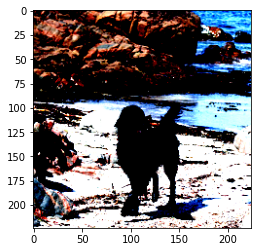

In [ ]:
for inputs,targets in train_loader:
  
  plt.imshow(inputs[1].numpy().transpose(1,2,0))
  print(targets[1])
  print([dataset_vocabulary[x] for x in targets[1]])
  break

**MOdel preparation**

In [ ]:
class CharRNN(nn.Module):
  def __init__(self,n_hidden=50,n_classes=83,n_layers=2,drop_prob=0.5,vocab_dim=50,emb_size=50,batch_size=64,device="cuda"):
      super().__init__()
      self.drop_prob = drop_prob
      self.n_layers = n_layers
      self.n_hidden = n_hidden
      self.batch_size=batch_size
      self.device=device
      self.embedding=nn.Embedding(vocab_dim,emb_size)
      self.lstm=nn.LSTM(emb_size,n_hidden,n_layers,dropout=self.drop_prob)
      self.linear=nn.Linear(n_hidden,n_classes)
      self.dropout=nn.Dropout(self.drop_prob)

  def init_hidden(self):
        """Set initial hidden states."""
        h0 = torch.randn(
            self.n_layers,
            self.batch_size,
            self.n_hidden,
        )
        c0 = torch.randn(
            self.n_layers,
            self.batch_size,
            self.n_hidden,
        )
        
        h0 = h0.to(self.device)
        c0 = c0.to(self.device)

        return h0, c0    


  def apply_rnn(self, embedding_out,previous_hiddens):
        #print(embedding_out.shape)
        #embedding_out=embedding_out.squeeze(1)
        #print(embedding_out.shape)
        if(previous_hiddens==False):
          embedding_out=embedding_out.squeeze(1)
          activations, (hn,cn) = self.lstm(embedding_out, self.init_hidden())
        else:
          activations, (hn,cn) = self.lstm(embedding_out,previous_hiddens)
        
        return activations,(hn,cn)

  def forward(self, inputs,previous_hiddens=False,return_activations=False):
        #print(len(inputs))
        self.batch_size = len(inputs)
    
        #inputs = torch.LongTensor(inputs).to(self.device)
        inputs=inputs.transpose(0,1)
        
        # Get embeddings
        #print("embedding input shape is",inputs.shape)
        embedding_out = self.embedding(inputs)
        #print("embedding output shape is",embedding_out.shape)
        activations,(hn,cn) = self.apply_rnn(embedding_out,previous_hiddens)
        #print("activations right out shape is",activations.shape)
        
        
        activations=activations.transpose(0,1) # output shape [batchSize,fixed_length,emb_length]
        #print("output actiavtions after transposing are",activations.shape)
        #activations=self.dropout(activations)
        activations=self.linear(activations)
        #print("output actiavtions after linear layer  are",activations.shape)
        #out = torch.sigmoid(activations)

        # Put the output back in correct order
        return activations,(hn,cn)    


In [ ]:
device="cuda"

In [ ]:
dropout_probability = 0.2  
n_rnn_layers = 1
embedding_dimension = 150
hidden_size = 250
is_bidirectional = False  
max_epochs = 10   
model = CharRNN(
    n_hidden=hidden_size,
    n_classes=len(int2word),
    vocab_dim=len(int2word),
    drop_prob=dropout_probability,
    n_layers=n_rnn_layers,
    emb_size=embedding_dimension,
    batch_size=batch_size,
    device=device

)
model = model.to(device)
print(model)
pytorch_total_params = sum(p.numel() for p in model.parameters())
print("total parameters are",pytorch_total_params)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:61: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


CharRNN(
  (embedding): Embedding(6708, 150)
  (lstm): LSTM(150, 250, dropout=0.2)
  (linear): Linear(in_features=250, out_features=6708, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
total parameters are 3091908


In [ ]:
model_ft=model_ft.to(device)

In [ ]:
def train_epoch(model,resnet_model,optimizer, train_loader):
    model.train()
    resnet_model.eval()
    total_loss = total = 0
    
    progress_bar = tqdm_notebook(train_loader, desc='Training', leave=False)
    for inputs,targets in progress_bar:
        #print(targets)
        target=torch.LongTensor(targets)
        inputs=torch.stack(inputs)
        target = target.to(device)
        inputs = inputs.to(device)
        #print(inputs.shape)
        #print(target.shape)
        optimizer.zero_grad()
        # Forwards pass
        #print("first image size is",inputs.shape)
        image_output=resnet_model(inputs)
        #print(image_output.shape)
        image_output=torch.argmax(image_output,axis=1)
        #print(image_output.shape)
        inputToLstm=[]
        present_current_output=[]
        
        for i in range(len(targets)):
           #k+=1
           present_current_output.append((int)(image_output[i]));
           for x in targets[i][:-1]:
             present_current_output.append(x)

           inputToLstm.append(present_current_output)  
           present_current_output=[] 
           #print(inputToLstm)
           
        inputToLstm=torch.tensor(inputToLstm).to(device)
        #print("first lstm input size to sending including resnet predictions",inputToLstm.shape)
        #print(inputToLstm.shape)
        #print(len(inputToLstm))
        #print(inputToLstm.shape)
        total=1
        
        output,_ = model(inputToLstm)
        
        outputs=output.permute(0,2,1)
        #print("output shape from lstm",outputs.shape)
        #print("target shape from lstm",target.shape)
        loss = nn.CrossEntropyLoss()(outputs, target)

        # Perform gradient descent, backwards pass
        loss.backward()
        #train_loss.append(loss.item())
        
        # Take a step in the right direction
        optimizer.step()
        #scheduler.step()

        # Record metrics
        total_loss += loss.item()
        total += len(target)
        progress_bar.set_description(
        f'train_loss: {loss:.2e}'
        f'\tavg_loss: {total_loss/total:.2e}\n',
      )

    return total_loss / total


def validate_epoch(model,resnet_model,valid_loader):
    model.eval()
    resnet_model.eval()
    total_loss = total = 0
    with torch.no_grad():
      progress_bar = tqdm_notebook(valid_loader, desc='Validating', leave=False)
      k=0
      for inputs,targets in progress_bar:
        k+=1
        target=torch.LongTensor(targets)
        inputs=torch.stack(inputs)
        target = target.to(device)
        inputs = inputs.to(device)
       
        
        image_output=resnet_model(inputs)
        image_output=torch.argmax(image_output,axis=1)
        inputToLstm=[]
        present_current_output=[]
        
        for i in range(len(targets)):
           #k+=1
           present_current_output.append((int)(image_output[i]));
           for x in targets[i][:-1]:
             present_current_output.append(x)

           inputToLstm.append(present_current_output)  
           present_current_output=[] 
          
        inputToLstm=torch.tensor(inputToLstm).to(device)
        #print(inputToLstm.shape)
        output,_ = model(inputToLstm)
        
        outputs=output.permute(0,2,1)
        loss = nn.CrossEntropyLoss()(outputs, target)

        # Record metrics
        total_loss += loss.item()
        total += len(target)
       
    return total_loss / total
  

In [ ]:
from torch import optim


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01,amsgrad=True)


In [ ]:

from tqdm import tqdm, tqdm_notebook

In [ ]:
def get_hidden():
        """Set initial hidden states."""
        h0 = torch.randn(
            n_rnn_layers,
            1,
            hidden_size,
        )
        c0 = torch.randn(
            n_rnn_layers,
            1,
            hidden_size,
        )
        
        h0 = h0.to(device)
        c0 = c0.to(device)

        return h0, c0

In [ ]:
import time
def print_re():
  smaple_img=0
  target=[]
  model.eval()
  model_ft.eval()
  for inputs,targets in test_loader:
    i=random.randrange(0,len(inputs))
    sample_img=inputs[i]
    target=targets[i]
    #plt.imshow(sample)
    break

  plt.imshow(sample_img.numpy().transpose(1,2,0))  
  plt.show()

  h0,c0=get_hidden()
  #print(h0,c0)
 
  with torch.no_grad():
        # Forwards pass
        image_output=model_ft(sample_img.unsqueeze(0).to(device))

        image_output=(int)(torch.argmax(image_output,axis=1))
        print(image_output)
        tokens=torch.tensor([image_output]).to(device)
        #print(tokens)
        tokens=tokens.unsqueeze(1)
        print("actual:",end='')
        for i in target:
            print(int2word[i]," ",end='')
        print()
        print("predicted: ",end='')
        for i in range(0,max_len):
          output,(h0,c0) = model(tokens,previous_hiddens=(h0,c0))
          #outputs=output.permute(0,2,1)
          #print(output.shape)
          hidden_output=output[0].squeeze(0).squeeze(0)
          if(i!=0 and  i%150==0):
            print()
          prediction = hidden_output.cpu().numpy()
          #print(prediction)
          prediction = np.argsort(-prediction, axis=0)
          #print(prediction)
          print(int2word[prediction[0]]," ",end='')
          #time.sleep(0.15)
          #print(h0)

          tokens=torch.tensor([prediction[0]]).unsqueeze(0).to(device)
          #print(tokens)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


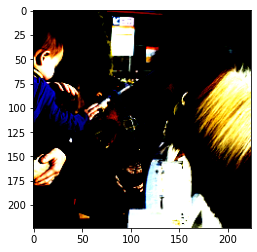

345
actual:a  man  hold  a  baby  who  be  pet  a  pony  
predicted: budweiser-sponsored  hound  boogie  mover  and  attend  snowpacked  paralell  brazilian  hairy  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


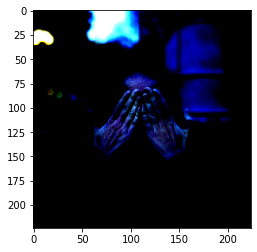

699
actual:a  woman  be  cover  her  eye  with  her  hand  <EOS>  
predicted: winston  winston  twisty  buggy  first  waterway  enthusiastic  port  via  fur  

In [ ]:
print_re()
print_re()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


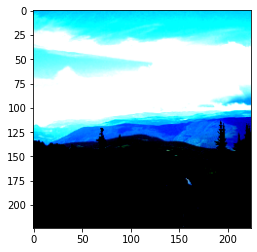

970
actual:a  dog  stand  on  a  hill  look  towards  a  valley  
predicted: a  man  in  a  black  wetsuit  surf  on  a  surfboard  
epoch #  1	train_loss: 4.10e+01	valid_loss: 4.91e-02



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


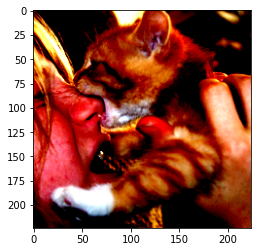

282
actual:an  orange  striped  kitten  be  bite  a  girl  on  a  
predicted: limousine  in  a  field  <EOS>  <EOS>  <EOS>  <EOS>  <EOS>  <EOS>  
epoch #  2	train_loss: 4.03e+01	valid_loss: 4.95e-02



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


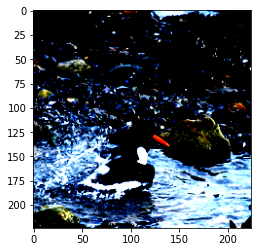

143
actual:black  and  white  bird  with  orange  beak  in  water  with  
predicted: a  man  be  stand  on  a  street  with  a  white  
epoch #  3	train_loss: 3.97e+01	valid_loss: 4.99e-02



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


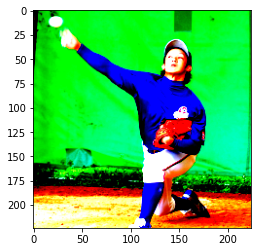

429
actual:a  yougn  boy  in  a  blue  and  white  baseball  uniform  
predicted: a  boy  in  a  red  shirt  be  play  cricket  on  
epoch #  4	train_loss: 3.93e+01	valid_loss: 5.02e-02



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


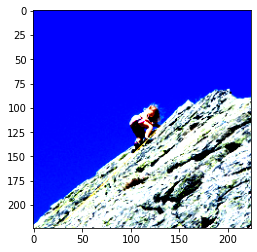

350
actual:a  girl  on  the  very  top  of  a  large  rock  
predicted: a  man  in  a  red  shirt  be  climb  a  rock  
epoch #  5	train_loss: 3.88e+01	valid_loss: 5.07e-02



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


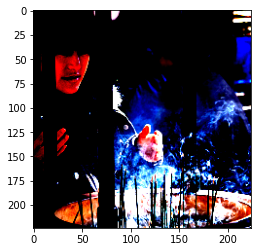

799
actual:a  woman  be  look  at  a  smoky  exhibit  <EOS>  <EOS>  
predicted: a  man  in  a  red  shirt  be  stand  in  front  
epoch #  6	train_loss: 3.83e+01	valid_loss: 5.07e-02



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


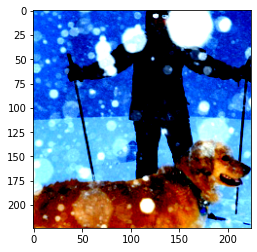

207
actual:a  man  be  ski  in  the  snow  with  a  large  
predicted: a  dog  be  run  through  the  snow  <EOS>  <EOS>  <EOS>  
epoch #  7	train_loss: 3.80e+01	valid_loss: 5.11e-02



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


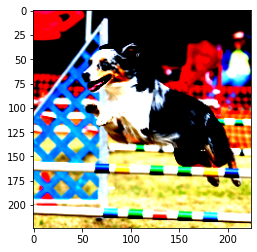

157
actual:a  dog  leap  over  a  hurdle  <EOS>  <EOS>  <EOS>  <EOS>  
predicted: a  dog  be  run  through  the  snow  <EOS>  <EOS>  <EOS>  
epoch #  8	train_loss: 3.77e+01	valid_loss: 5.18e-02



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


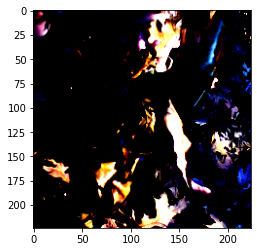

611
actual:a  young  boy  be  play  in  leaf  <EOS>  <EOS>  <EOS>  
predicted: a  man  in  a  white  shirt  be  stand  next  to  
epoch #  9	train_loss: 3.74e+01	valid_loss: 5.20e-02



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


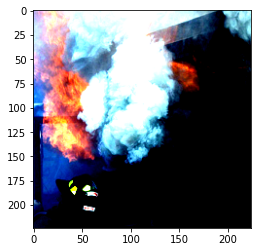

980
actual:firefighter  be  just  under  the  flame  and  smoke  <EOS>  <EOS>  
predicted: a  man  be  stand  on  a  rock  in  a  city  
epoch # 10	train_loss: 3.71e+01	valid_loss: 5.21e-02



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


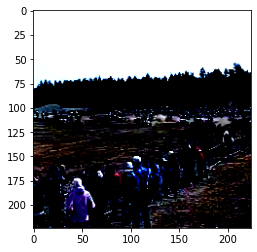

974
actual:a  group  of  person  on  the  sideline  of  an  atv  
predicted: a  man  in  a  red  shirt  be  stand  in  front  
epoch # 11	train_loss: 3.68e+01	valid_loss: 5.24e-02



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


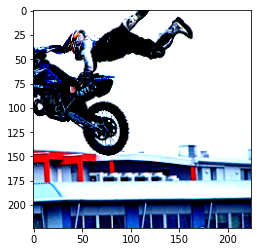

518
actual:a  motocross  racer  do  a  trick  in  midair  <EOS>  <EOS>  
predicted: a  motorcyclist  speed  along  a  road  <EOS>  <EOS>  <EOS>  <EOS>  
epoch # 12	train_loss: 3.66e+01	valid_loss: 5.28e-02



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


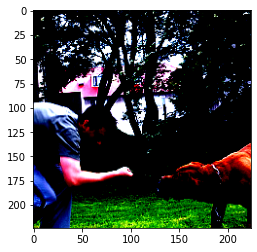

339
actual:a  man  and  a  dog  be  play  tug  of  war  
predicted: a  man  be  interview  a  man  in  a  grassy  meadow  
epoch # 13	train_loss: 3.65e+01	valid_loss: 5.30e-02



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


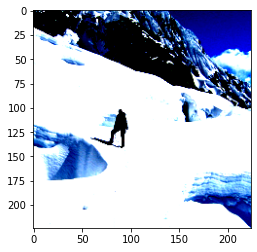

970
actual:a  lone  man  climb  high  on  a  snowy  mountain  <EOS>  
predicted: a  man  in  a  gray  shirt  be  stand  next  to  
epoch # 14	train_loss: 3.63e+01	valid_loss: 5.32e-02



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


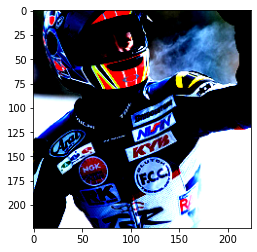

518
actual:a  man  wear  a  sponsor  cover  motorcycle  suit  sit  on  
predicted: a  man  on  a  motorcycle  pop  a  wheelie  in  a  
epoch # 15	train_loss: 3.61e+01	valid_loss: 5.34e-02



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


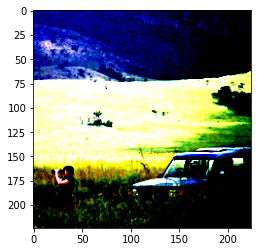

609
actual:a  person  hold  a  piece  of  equipment  up  to  her  
predicted: a  man  in  a  blue  jacket  be  ride  a  horse  
epoch # 16	train_loss: 3.59e+01	valid_loss: 5.36e-02



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


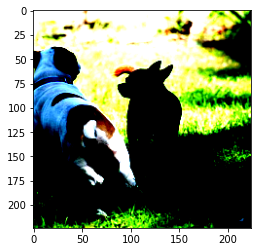

158
actual:two  dog  look  at  one  another  outside  <EOS>  <EOS>  <EOS>  
predicted: a  black  and  white  dog  be  run  through  a  field  
epoch # 17	train_loss: 3.58e+01	valid_loss: 5.39e-02



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


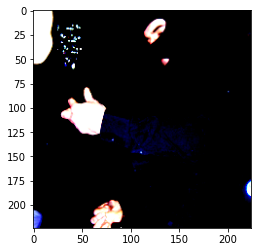

796
actual:a  man  be  a  black  ninja  suit  with  a  mask  
predicted: a  man  in  a  black  shirt  be  stand  on  a  
epoch # 18	train_loss: 3.57e+01	valid_loss: 5.38e-02



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


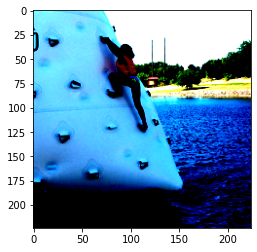

972
actual:two  girl  be  climb  on  an  artificial  climb  wall  that  
predicted: a  man  climb  a  rock  wall  <EOS>  <EOS>  <EOS>  <EOS>  
epoch # 19	train_loss: 3.56e+01	valid_loss: 5.44e-02



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


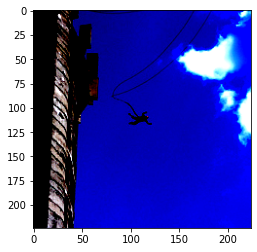

733
actual:a  person  hang  from  rope  high  in  the  air  next  
predicted: a  man  in  a  red  shirt  be  stand  on  a  
epoch # 20	train_loss: 3.55e+01	valid_loss: 5.45e-02



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


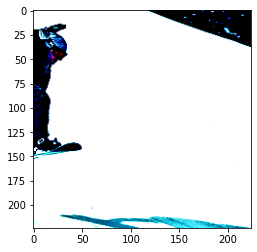

795
actual:a  snowboarder  ride  <EOS>  <EOS>  <EOS>  <EOS>  <EOS>  <EOS>  <EOS>  
predicted: a  snowboarder  jump  over  a  barricade  in  the  snow  <EOS>  
epoch # 21	train_loss: 3.53e+01	valid_loss: 5.51e-02



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


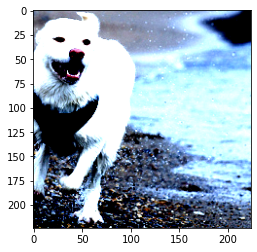

248
actual:a  white  dog  run  with  one  ear  up  <EOS>  <EOS>  
predicted: a  dog  run  through  the  grass  <EOS>  <EOS>  <EOS>  <EOS>  
epoch # 22	train_loss: 3.52e+01	valid_loss: 5.49e-02



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


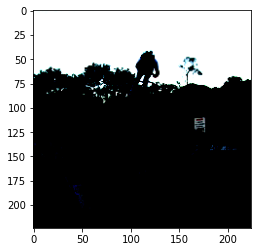

460
actual:a  teenage  boy  on  a  bicycle  be  jump  off  a  
predicted: a  man  in  a  blue  shirt  and  a  blue  hardhat  
epoch # 23	train_loss: 3.51e+01	valid_loss: 5.49e-02



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


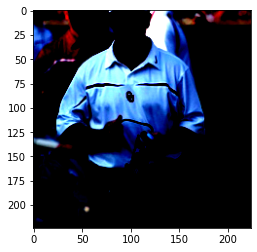

981
actual:a  discouraged  look  football  coach  <EOS>  <EOS>  <EOS>  <EOS>  <EOS>  
predicted: a  man  in  a  white  shirt  and  blue  short  be  
epoch # 24	train_loss: 3.50e+01	valid_loss: 5.50e-02



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


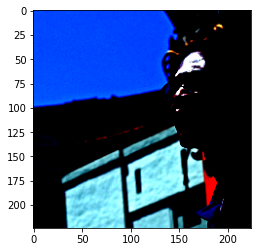

740
actual:a  man  with  glasses  be  stand  in  front  of  a  
predicted: a  man  in  a  black  shirt  be  stand  in  front  
epoch # 25	train_loss: 3.50e+01	valid_loss: 5.57e-02




In [ ]:
train_losses, valid_losses = [], []
n_epochs=0
model_ft=model_ft.to(device)
for _ in tqdm_notebook( range(25)):
    train_loss = train_epoch(model,model_ft,optimizer,train_loader)
    valid_loss = validate_epoch(model,model_ft,test_loader)
   
    #print()
    print()
    #print("reby beauty's rose might never die, but as the ri<EOS>50")
    #print_re('f',get_hidden())
    print_re()
    print()
    #print()

    tqdm.write(
        f'epoch #{n_epochs + 1:3d}\ttrain_loss: {train_loss:.2e}'
        f'\tvalid_loss: {valid_loss:.2e}\n',
    )
    '''if len(valid_losses) > 5 and all(valid_loss >= loss
                                     for loss in valid_losses[-5:]):
        print('Stopping early')
        break
    '''
    # Early stopping if the current valid_loss is greater than the last three valid losses
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    n_epochs+=1
   

In [ ]:
torch.save(model_ft.state_dict(), "/content/drive/MyDrive/resnet_imageCaptioning.pt")
torch.save(model.state_dict(), "/content/drive/MyDrive/lstm_imageCaptioning.pt")

In [ ]:
import matplotlib.pyplot as plt

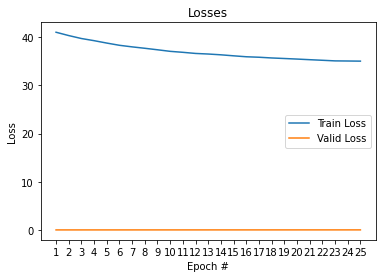

In [ ]:

epoch_ticks = range(1, n_epochs + 1)
plt.plot(epoch_ticks, train_losses)
plt.plot(epoch_ticks, valid_losses)
plt.legend(['Train Loss', 'Valid Loss'])
plt.title('Losses') 
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.xticks(epoch_ticks)
plt.show()